In [31]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [3]:
def get_centroid(word_forms, model):
    vectors = [model.wv[word] for word in word_forms if word in model.wv]
    if not vectors:
        return None
    centroid = np.mean(vectors, axis=0)
    return centroid

In [4]:
def calculate_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

In [5]:
import json
file_path = 'all_forms_dict.json'

with open(file_path, 'r') as file:
    all_forms_dict = json.load(file)

In [10]:
all_forms_dict['хохол']

['хохла',
 'хохлу',
 'хохлам',
 'хохлом',
 'хохлами',
 'хохле',
 'хохлах',
 'хохлов',
 'хохол',
 'хохлы']

In [11]:
all_forms_dict['укр']

['укр']

In [7]:
models_path = '/Users/katerynaburovova/PycharmProjects/dehumanization/w2v_models/models_in_time'

In [23]:
terms = [all_forms_dict['украинец']] + [all_forms_dict['укроп']]
terms

[['украинца',
  'украинце',
  'украинцам',
  'украинцем',
  'украинцах',
  'украинцы',
  'украинцами',
  'украинцев',
  'украинцу',
  'украинец'],
 ['укропу',
  'укропов',
  'укропах',
  'укропом',
  'укроп',
  'укропам',
  'укропами',
  'укропы',
  'укропа',
  'укропе']]

In [59]:
all_forms_dict['укропский']

['укропскими',
 'укропской',
 'укропского',
 'укропским',
 'укропскою',
 'укропские',
 'укропское',
 'укропском',
 'укропский',
 'укропских',
 'укропская',
 'укропскому',
 'укропскую']

In [27]:
def extract_time_period(model_name):
    match = re.search(r'(\d{4}-\d{2}-\d{2})_to_(\d{4}-\d{2}-\d{2})', model_name)
    if match:
        return match.group(1), match.group(2)
    return None, None

In [54]:
import pymorphy2

def get_word_forms(word):
    morph = pymorphy2.MorphAnalyzer()
    parsed_word = morph.parse(word)
    forms = []
    for parse_result in parsed_word:
        for form in parse_result.lexeme:
            forms.append(form.word)
    return forms

In [56]:
# def plot_denotation_divergence_w_time(all_forms_dict, term_one, term_two, models_path):
#     terms = get_word_forms(term_one) + get_word_forms(term_two)
#     distance_list = []
#     time_periods = []
#     for model_name in sorted(os.listdir(models_path)):
#         if not model_name.endswith('.model'):
#             continue
#
#         start_date, end_date = extract_time_period(model_name)
#         if not start_date or not end_date:
#             continue
#
#         model_path = os.path.join(models_path, model_name)
#         model = Word2Vec.load(model_path)
#
#         centroid1 = get_centroid(terms[0], model)
#         centroid2 = get_centroid(terms[1], model)
#
#         if centroid1 is None or centroid2 is None:
#             continue
#
#         distance = calculate_distance(centroid1, centroid2)
#         distance_list.append(distance)
#         time_periods.append(f'{start_date} - {end_date}')
#
#     plt.figure(figsize=(10, 6))
#     plt.plot(distance_list)
#     plt.xticks(range(len(time_periods)), time_periods, rotation=90)
#     plt.xlabel('Time Periods')
#     plt.ylabel('Cosine distance')
#     plt.title('Denotation Divergence in Time of Terms {} and {}'.format(term_one, term_two))
#     plt.tight_layout()
#     plt.show()

In [60]:
def plot_denotation_divergence_w_time(all_forms_dict, term_one, term_two, models_path):
    terms = get_word_forms(term_one) + get_word_forms(term_two)
    distance_list = []
    time_periods = []

    model_files = sorted(os.listdir(models_path), key=lambda x: extract_time_period(x)[0] if x.endswith('.model') else '')

    for model_name in model_files:
        if not model_name.endswith('.model'):
            continue

        start_date, end_date = extract_time_period(model_name)
        if not start_date or not end_date:
            continue

        model_path = os.path.join(models_path, model_name)
        model = Word2Vec.load(model_path)

        centroid1 = get_centroid(terms[0], model)
        centroid2 = get_centroid(terms[1], model)

        if centroid1 is None or centroid2 is None:
            continue

        distance = calculate_distance(centroid1, centroid2)
        distance_list.append(distance)
        time_periods.append(f'{start_date} - {end_date}')

    plt.figure(figsize=(10, 6))
    plt.plot(distance_list)
    plt.xticks(range(len(time_periods)), time_periods, rotation=90)
    plt.xlabel('Time Periods')
    plt.ylabel('Cosine distance')
    plt.title('Denotation Divergence in Time of Terms {} and {}'.format(term_one, term_two))
    plt.tight_layout()
    plt.show()

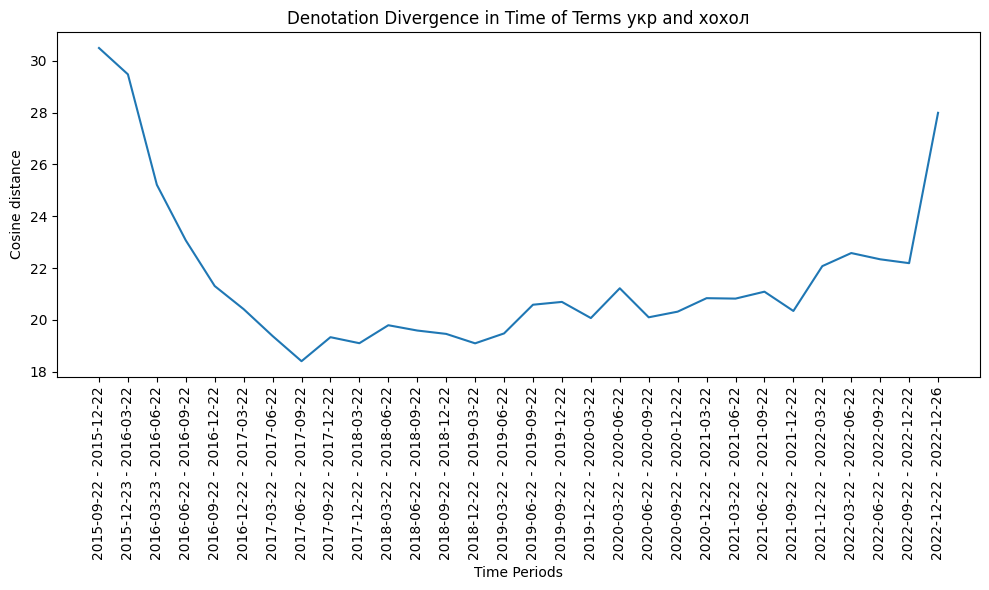

CPU times: user 1min 24s, sys: 10 s, total: 1min 34s
Wall time: 1min 45s


In [66]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'укр', 'хохол', models_path)

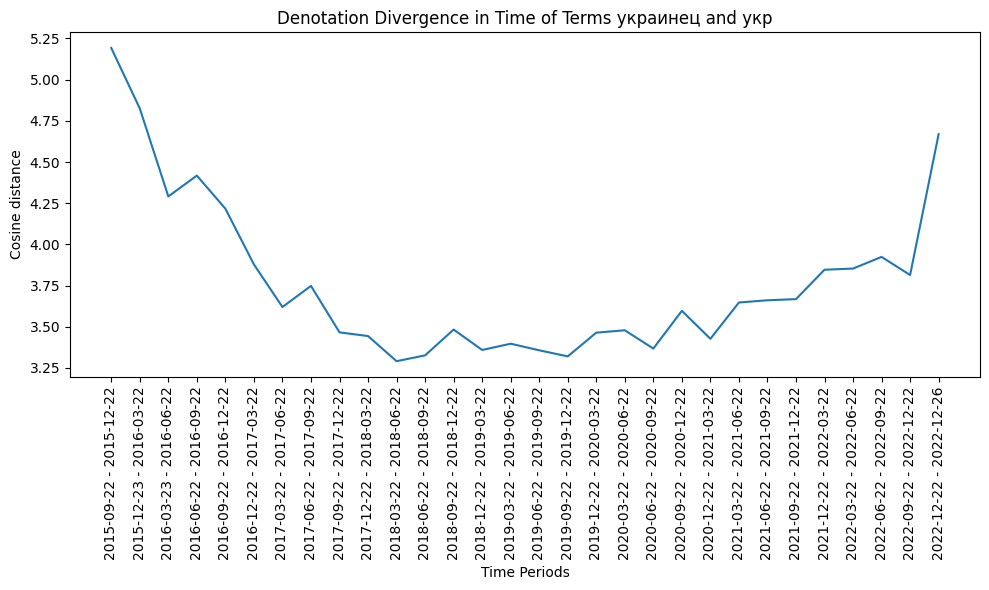

CPU times: user 1min 23s, sys: 10.9 s, total: 1min 34s
Wall time: 1min 47s


In [71]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'украинец', 'укр', models_path)

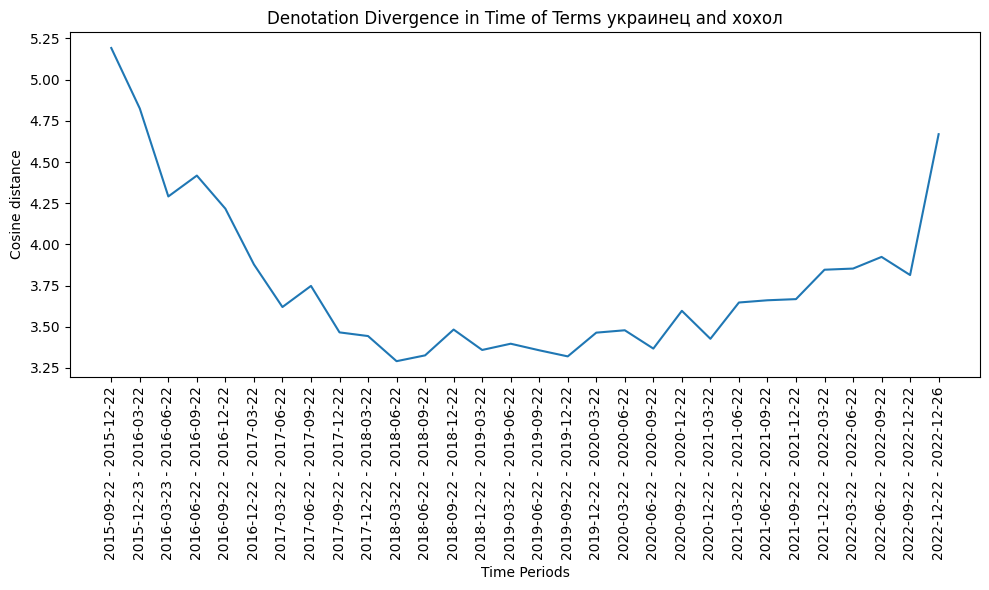

CPU times: user 1min 22s, sys: 9.75 s, total: 1min 32s
Wall time: 1min 43s


In [72]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'украинец', 'хохол', models_path)

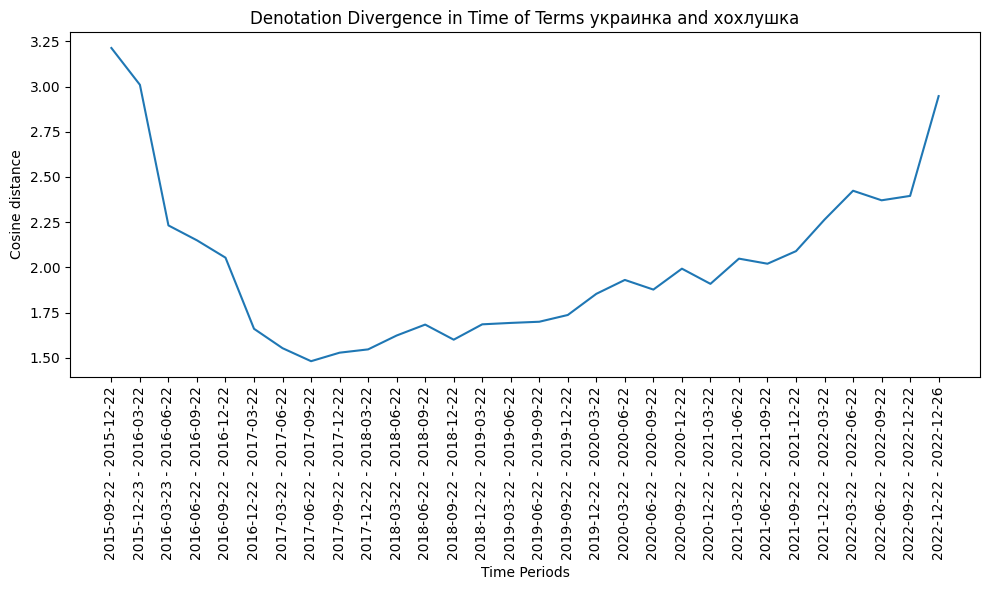

CPU times: user 1min 22s, sys: 10.5 s, total: 1min 33s
Wall time: 1min 41s


In [73]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'украинка', 'хохлушка', models_path)

In [46]:
all_forms_dict.keys()

dict_keys(['укр', 'украинец', 'украинка', 'хохол', 'хохлушка', 'укроп', 'Украина', 'украинский', 'украинская', 'украинское', 'хохлятский', 'хохлятская', 'хохлятское', 'укропский', 'укропская', 'укропское'])

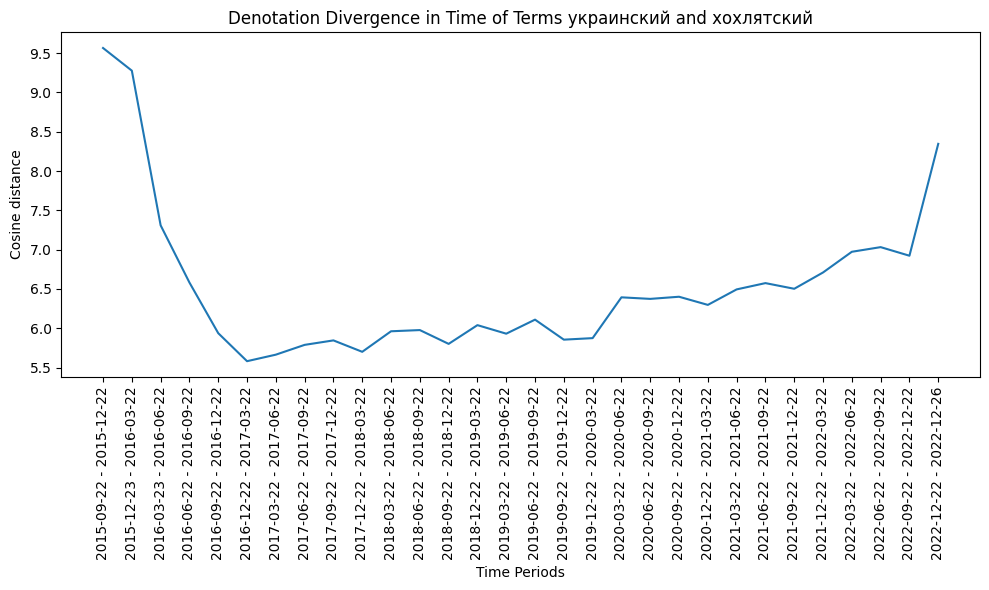

CPU times: user 1min 22s, sys: 10.1 s, total: 1min 32s
Wall time: 1min 44s


In [74]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'украинский', 'хохлятский', models_path)

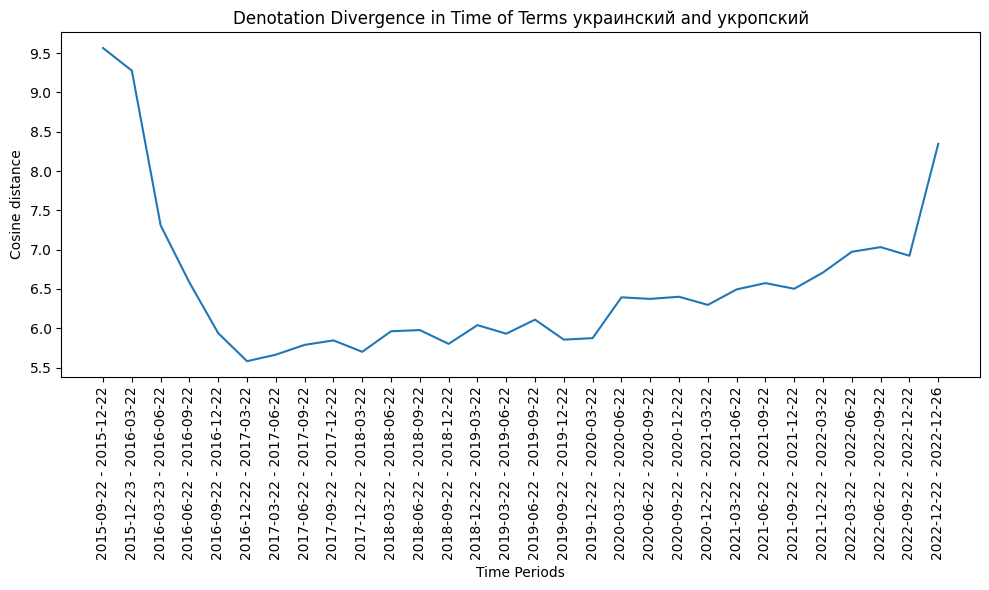

CPU times: user 1min 22s, sys: 9.6 s, total: 1min 32s
Wall time: 1min 43s


In [61]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'украинский', 'укропский', models_path)

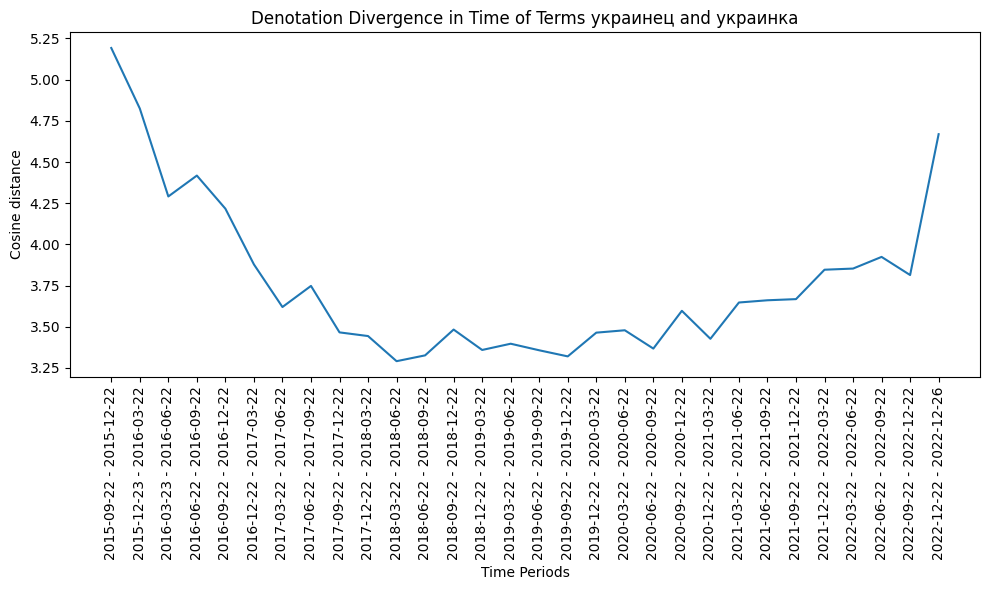

CPU times: user 1min 22s, sys: 9.79 s, total: 1min 32s
Wall time: 1min 43s


In [75]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'украинец', 'украинка', models_path)

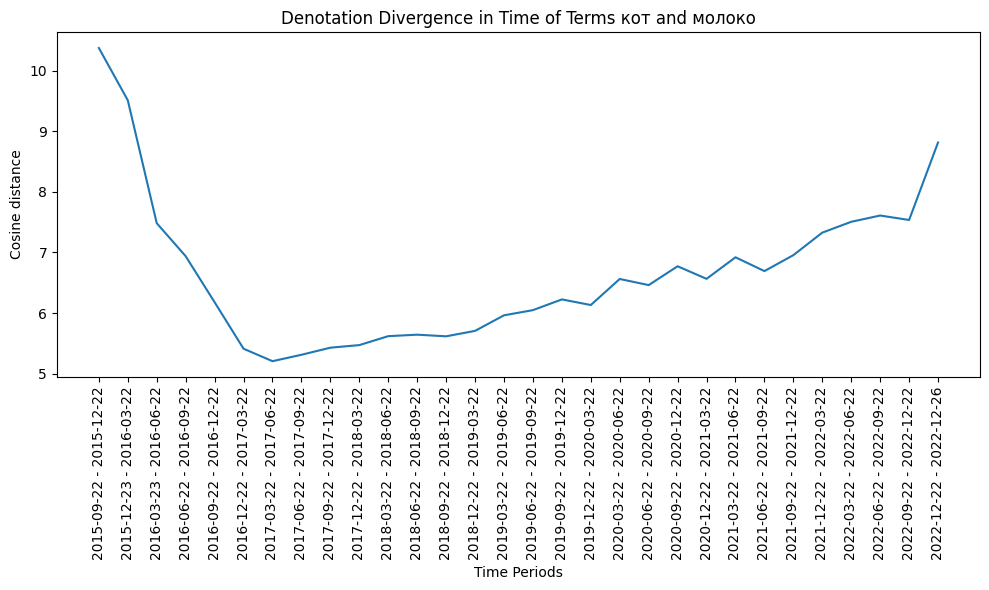

CPU times: user 1min 23s, sys: 10.9 s, total: 1min 33s
Wall time: 1min 46s


In [76]:
%%time

plot_denotation_divergence_w_time(all_forms_dict, 'кот', 'молоко', models_path)

In [77]:
from scipy.spatial.distance import euclidean

def plot_denotation_divergence_w_time_eucl(all_forms_dict, term_one, term_two, models_path):
    terms = get_word_forms(term_one) + get_word_forms(term_two)
    distance_list = []
    time_periods = []

    model_files = sorted(os.listdir(models_path), key=lambda x: extract_time_period(x)[0] if x.endswith('.model') else '')

    for model_name in model_files:
        if not model_name.endswith('.model'):
            continue

        start_date, end_date = extract_time_period(model_name)
        if not start_date or not end_date:
            continue

        model_path = os.path.join(models_path, model_name)
        model = Word2Vec.load(model_path)

        centroid1 = get_centroid(terms[0], model)
        centroid2 = get_centroid(terms[1], model)

        if centroid1 is None or centroid2 is None:
            continue

        distance = euclidean(centroid1, centroid2)
        distance_list.append(distance)
        time_periods.append(f'{start_date} - {end_date}')

    plt.figure(figsize=(10, 6))
    plt.plot(distance_list)
    plt.xticks(range(len(time_periods)), time_periods, rotation=90)
    plt.xlabel('Time Periods')
    plt.ylabel('Cosine distance')
    plt.title('Denotation Divergence in Time of Terms {} and {}'.format(term_one, term_two))
    plt.tight_layout()
    plt.show()

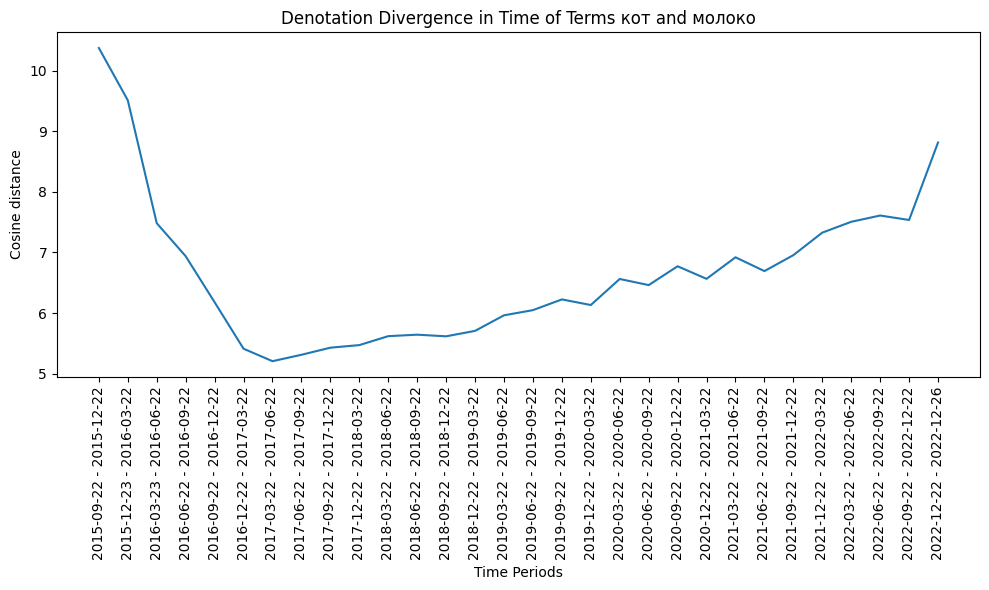

CPU times: user 1min 23s, sys: 10.6 s, total: 1min 34s
Wall time: 1min 46s


In [78]:
%%time

plot_denotation_divergence_w_time_eucl(all_forms_dict, 'кот', 'молоко', models_path)

![post dynamics](/Users/katerynaburovova/PycharmProjects/dehumanization/pics/posts_over_time.png)

In [81]:
from scipy.spatial.distance import cityblock

def plot_denotation_divergence_w_time_manh(all_forms_dict, term_one, term_two, models_path):
    terms = get_word_forms(term_one) + get_word_forms(term_two)
    distance_list = []
    time_periods = []

    model_files = sorted(os.listdir(models_path), key=lambda x: extract_time_period(x)[0] if x.endswith('.model') else '')

    for model_name in model_files:
        if not model_name.endswith('.model'):
            continue

        start_date, end_date = extract_time_period(model_name)
        if not start_date or not end_date:
            continue

        model_path = os.path.join(models_path, model_name)
        model = Word2Vec.load(model_path)

        centroid1 = get_centroid(terms[0], model)
        centroid2 = get_centroid(terms[1], model)

        if centroid1 is None or centroid2 is None:
            continue

        distance = cityblock(centroid1, centroid2)
        distance_list.append(distance)
        time_periods.append(f'{start_date} - {end_date}')

    plt.figure(figsize=(10, 6))
    plt.plot(distance_list)
    plt.xticks(range(len(time_periods)), time_periods, rotation=90)
    plt.xlabel('Time Periods')
    plt.ylabel('Cosine distance')
    plt.title('Denotation Divergence in Time of Terms {} and {}'.format(term_one, term_two))
    plt.tight_layout()
    plt.show()

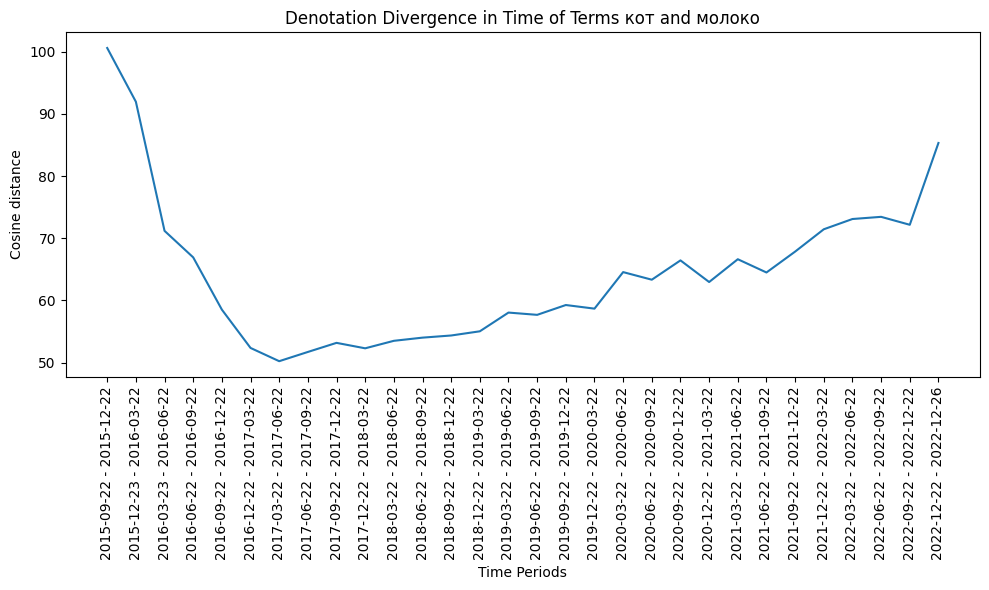

CPU times: user 1min 22s, sys: 10.5 s, total: 1min 33s
Wall time: 1min 44s


In [82]:
%%time

plot_denotation_divergence_w_time_manh(all_forms_dict, 'кот', 'молоко', models_path)

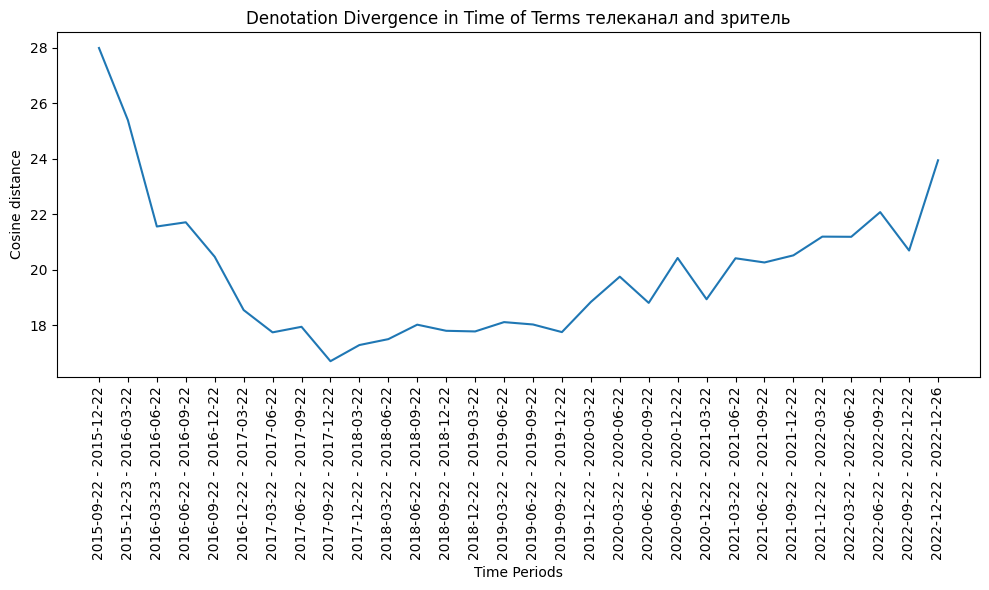

CPU times: user 1min 22s, sys: 10.4 s, total: 1min 33s
Wall time: 1min 44s


In [83]:
%%time

plot_denotation_divergence_w_time_manh(all_forms_dict, 'телеканал', 'зритель', models_path)